# LSTM
LSTM(Long short-term memory)は、RNN(Recurrent Neural Network)の拡張として1995年に登場した、時系列データ(sequential data)に対するモデル、あるいは構造(architecture)の1種です。  
その名は、Long term memory(長期記憶)とShort term memory(短期記憶)という神経科学における用語から取られています。  LSTMはRNNの中間層のユニットをLSTM blockと呼ばれるメモリと3つのゲートを持つブロックに置き換えることで実現されています。



$$f=\sigma (x_tW_{x}^{(f)}+h_{t-1}W_{h}^{(f)}+b^{(f)})$$
$$g=\tanh(x_tW_{x}^{(g)}+h_{t-1}W_{h}^{(g)}+b^{(g)})$$
$$i =\sigma (x_tW_{x}^{(i)}+h_{t-1}W_{h}^{(i)}+b^{(i)})$$
$$o=\sigma (x_tW_{x}^{(o)}+h_{t-1}W_{h}^{(o)}+b^{(o)})$$
$$ c_t=f\odot c_{t-1}+g\odot i$$
$$h_t=o\odot tanh(c_t)$$

In [5]:
import numpy as np
from common.util import *

In [6]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [7]:
# 文章からコーパスを作る
copus, word_id, id_word = preprocess("My name is ishikawa. I like music.")

#ボキャブラリーサイズ　単語数
vocab_size = len(word_id)

# コンテキスト(単語に対しての両サイドの出現数)
contexts, target = create_contexts_target(copus)

contexts = convert_one_hot(contexts,vocab_size)
target = convert_one_hot(target,vocab_size)

In [8]:
# #隠れ層のサイズ
# h = 3

# Wx = np.random.randn(vocab_size,)
# #隠れ層への重み
# Wx = np.zeros_like(x)
# # Wh = np.zeros_like()

# # def LSTM(X,Wh,Wx,b)

# 実装

In [9]:
class lstm:
    def __init__(self,x):
        self.Wx = np.random.randn(x.shape[2],4*3)
        self.Wh = np.random.randn(x.shape[2],4*3)
        self.b = np.zeros(12)
        self.ht1 = np.zeros((2,4*3))
        self.old_c = np.random.randn(2,4*3)
        self.x = x
        
    def foward(self):
        for x in self.x:
            print(np.dot(self.ht1,self.Wh.T)+self.b)
            a = np.dot(x,self.Wx)#+np.dot(self.ht1.T,self.Wh)+self.b
            f = sigmoid(a)
            g = np.tanh(a)
            i = sigmoid(a)
            o = sigmoid(a)
            
            self.c_old = f *  self.old_c + g * i
            self.ht1 = o*(np.tanh( self.old_c))
            print(o.shape)

In [10]:
import sys
sys.path.append("..")
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from rnnlm import Rnnlm

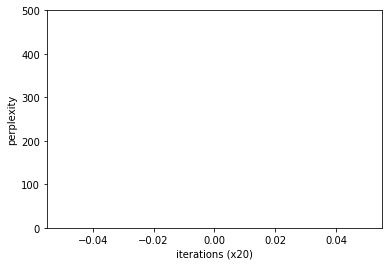

NameError: name 'corpus_test' is not defined

In [11]:

# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
#from dataset import ptb
from rnnlm import Rnnlm
import numpy as np


# ハイパーパラメータの設定
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNNの隠れ状態ベクトルの要素数
time_size = 35  # RNNを展開するサイズ
lr = 20.0
max_epoch = 4
max_grad = 0.25


# 文章からコーパスを作る
copus, word_id, id_word = preprocess("My name is ishikawa. I like music.")

#ボキャブラリーサイズ　単語数
vocab_size = len(word_id)

# コンテキスト(単語に対しての両サイドの出現数)
contexts, target = create_contexts_target(copus)

corpus = convert_one_hot(contexts,vocab_size)
y_train = convert_one_hot(target,vocab_size)
xs = corpus[:-1]
ts = corpus[1:]

# 文章からコーパスを作る
copus, word_to_id, id_to_word = preprocess("My name is ishikawa. I like guitar.")

#ボキャブラリーサイズ　単語数
vocab_size = len(word_id)

# コンテキスト(単語に対しての両サイドの出現数)
contexts, target = create_contexts_target(copus)

X_test = convert_one_hot(contexts,vocab_size)
y_test = convert_one_hot(target,vocab_size)
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# モデルの生成
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 勾配クリッピングを適用して学習
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# テストデータで評価
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('test perplexity: ', ppl_test)

# パラメータの保存
model.save_params()

In [39]:
import nltk
import numpy as np
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from pandas import read_csv
import collections
from sklearn.model_selection import train_test_split


dataset = read_csv('Womens Clothing E-Commerce Reviews.csv')
reviews = dataset['Review Text'].astype('str')
recommend = dataset['Recommended IND']


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def review_prepare(review):
    review = review.lower()# lowercase text
    review = re.sub(REPLACE_BY_SPACE_RE," ",review)# replace REPLACE_BY_SPACE_RE symbols by space in text
    review = re.sub(BAD_SYMBOLS_RE,"",review)# delete symbols which are in BAD_SYMBOLS_RE from text
    review = re.sub(' +',' ',review)
    review = " ".join([word for word in review.split() if word not in STOPWORDS]) # delete stopwords from text
    return review

reviews_prepared = [review_prepare(review) for review in reviews]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishikawaryuuichi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# kaggleのデータセットを使い学習

In [45]:
reviews_prepared

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite',
 'high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments',
 'shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt',
 'love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea

In [46]:
train = ".  ".join(reviews_prepared)

In [47]:
train

'absolutely wonderful silky sexy comfortable.  love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite.  high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c.  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments.  shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt.  love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work

In [48]:
# 文章からコーパスを作る
copus, word_id, id_word = preprocess(train)

#ボキャブラリーサイズ　単語数
vocab_size = len(word_id)

# コンテキスト(単語に対しての両サイドの出現数)
# contexts, target = create_contexts_target(copus)

# contexts = convert_one_hot(contexts,vocab_size)
# target = convert_one_hot(target,vocab_size)

In [52]:
ts = copus[1:]

In [53]:
xs = copus[:-1]

In [59]:
wordvec_size = 100
time_size = 35
max_grad = 0.25
eval_interval=20
max_epoch = 4

In [56]:
model = Rnnlm(vocab_size, wordvec_size, 100)

In [57]:
optimizer = SGD(lr)

In [58]:
trainer = RnnlmTrainer(model,optimizer)

In [ ]:
trainer.fit(xs,ts ,max_epoch, 20,time_size,max_grad,eval_interval=20)

| epoch 1 |  iter 1 / 1026 | time 0[s] | perplexity 19504.28
| epoch 1 |  iter 21 / 1026 | time 10[s] | perplexity 5750.00
| epoch 1 |  iter 41 / 1026 | time 20[s] | perplexity 1884.51
| epoch 1 |  iter 61 / 1026 | time 30[s] | perplexity 1479.79
| epoch 1 |  iter 81 / 1026 | time 39[s] | perplexity 1336.91
| epoch 1 |  iter 101 / 1026 | time 49[s] | perplexity 1259.38
| epoch 1 |  iter 121 / 1026 | time 58[s] | perplexity 1090.15
| epoch 1 |  iter 141 / 1026 | time 67[s] | perplexity 1098.42
| epoch 1 |  iter 161 / 1026 | time 77[s] | perplexity 1012.18
| epoch 1 |  iter 181 / 1026 | time 86[s] | perplexity 1041.72
| epoch 1 |  iter 201 / 1026 | time 95[s] | perplexity 982.04
| epoch 1 |  iter 221 / 1026 | time 105[s] | perplexity 961.33
| epoch 1 |  iter 241 / 1026 | time 114[s] | perplexity 912.41
| epoch 1 |  iter 261 / 1026 | time 124[s] | perplexity 916.58
| epoch 1 |  iter 281 / 1026 | time 134[s] | perplexity 856.52


重いので止めましたが学習まで確認できました。